In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation

from PointTracking_v2 import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

Let's run the animation with the ideal parameters found to yield stability in the simulation

Total Imag Time:  1.2898211479187012
kmax:  4.0212385965949355
T:  4.042589962686201
(41, 128, 128)
(1, 128, 128)


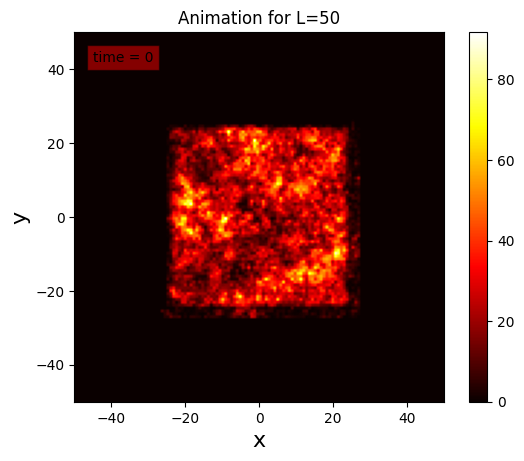

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 10000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 1/2, dst = False, vortex = True)

Now, let's implement the tracking for the vortices. The goal is to track the pair of vortices, allowing for the appearance of new vortices, but not tracking them. We can do this by finding the minimum distance between the current vortices and the vortices detected in the next frame.

Edge cases: 
1. What happens when there are extra vortices from the beginning of the simulation? How can you tell which ones are the original vortices? 
    - One solution: see where the vortices begin to disappear and remove them from tracking. This requires a remove function... 
2. What happens when a vortex-anti-vortex pair merges or anhilates? 
    - Also must remove vortices... 
3. Note that we also should not be tracking vortices of the type that were NOT spawned in the first place! filter out this ones via an if statement somewhere

In [3]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)

In [4]:
pt.labelVortices(tracker) 

Active Points:  [(23.828125, 24.609375), (28.515625, 25.390625)]
New Detected Vortices:  []
New Detected AntiVortices:  [[23.828125 24.609375]
 [28.515625 25.390625]]
Shape, Vortex positions:  (0,)
Shape, Vortex Coords:  (0,)
AntiVortex Closest Match:  [0 1]

Active Points:  [(23.828125, 24.609375), (28.515625, 25.390625)]
New Detected Vortices:  []
New Detected AntiVortices:  [[23.828125 25.390625]
 [28.515625 25.390625]]
Shape, Vortex positions:  (0,)
Shape, Vortex Coords:  (0,)
AntiVortex Closest Match:  [0 1]

Active Points:  [(23.828125, 24.609375), (28.515625, 25.390625)]
New Detected Vortices:  []
New Detected AntiVortices:  [[23.828125 25.390625]
 [28.515625 25.390625]]
Shape, Vortex positions:  (0,)
Shape, Vortex Coords:  (0,)
AntiVortex Closest Match:  [0 1]

Active Points:  [(23.828125, 24.609375), (28.515625, 25.390625)]
New Detected Vortices:  []
New Detected AntiVortices:  [[23.828125 25.390625]
 [28.515625 25.390625]]
Shape, Vortex positions:  (0,)
Shape, Vortex Coords: 

To be done - fix the pre-existing tracker to track only the main vortices and ignore the other ones 

Do this by doing the same euclidean distance thing in the newer algorithm and ignore all points that are not used. This should theoretically work... 

In [ ]:
from scipy.cluster.vq import vq

code_book = np.array([(24,25), (25,27)])

features  = np.array([(25,25), (26,28), (20,31)])

plt.figure() 
for i in range(len(code_book)): 
    plt.scatter(code_book[i][0], code_book[i][1], color = 'blue')
for i in range(len(features)): 
    plt.scatter(features[i][0], features[i][1], color = 'orange')
plt.show() 


In [ ]:
vq( features, code_book)

In [ ]:
from collections import defaultdict
source = "ABABDBAAEDSBQEWBAFLSAFB"
def list_duplicates(seq):
    tally = defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i)
    return ((key,locs) for key,locs in tally.items() if len(locs)>1)

for dup in sorted(list_duplicates(source)):
    print(dup)